In [1]:
import pandas as pd
import json

with open("/Users/robinfeldmann/TopicAnalysisRUWTweets/test_trans.json", "r") as this:
    word_dict = json.loads(this.read())


def get_inverse_translations(word, language):
    if language == "en":
        return [word]
    tr = [
        key for (key, val) in word_dict[language].items() if val.lower() == word.lower()
    ]
    if tr == []:
        return [word]

    if not word in tr:
        tr += [word]

    if not word.lower() in tr:
        tr += [word.lower()]
    return tr

In [4]:
import pandas as pd

df = pd.read_csv(
    "/Users/robinfeldmann/TopicAnalysisRUWTweets/Data/Sentiments/all_sentiments.csv"
)

In [8]:
print(df.shape)
df["date"] = df["tweetcreatedts"].str.slice(stop=10)
df = df[(df["date"].str.len() == 10.0)]
df = df[df["date"] != "1.48916471"]
df = df[df["date"] != "2932460195"]
print(df.shape)

(18288203, 7)
(18288190, 8)


In [202]:
df.to_csv(
    "/Users/robinfeldmann/TopicAnalysisRUWTweets/Data/Sentiments/all_sentiments_2.csv"
)

In [9]:
from tqdm.auto import tqdm

tqdm.pandas()

df["weeks"] = (
    df["date"]
    .progress_apply(pd.to_datetime)
    .progress_apply(
        lambda x: (
            str(x.year) + "-" + str(x.week)
            if len(str(x.week)) == 2
            else str(x.year) + "-0" + str(x.week)
        )
    )
)

100%|██████████| 18288190/18288190 [00:25<00:00, 721419.70it/s] 


In [99]:
from tqdm.auto import tqdm

tqdm.pandas()

df["months"] = (
    df["date"]
    .progress_apply(pd.to_datetime)
    .progress_apply(
        lambda x: (
            str(x.year) + "-" + str(x.month)
            if len(str(x.month)) == 2
            else str(x.year) + "-0" + str(x.month)
        )
    )
)

100%|██████████| 18288190/18288190 [00:21<00:00, 837675.76it/s] 


In [189]:
from src.explorativ_analysis_05 import split_strings_to_list
from src.explorativ_analysis_05 import split_strings_to_list


dfs = []

for lang in ["en", "de", "it", "fr", "es", "uk", "ru"]:
    df_cur = pd.read_csv(
        f"/Users/robinfeldmann/TopicAnalysisRUWTweets/Data/Lemmas/{lang}.csv"
    )
    df_cur["lemmas"] = df_cur["lemmas"].apply(split_strings_to_list)

    df_cur = df.query(f"lang=='{lang}'").join(
        df_cur[["tweetid", "lemmas"]].set_index("tweetid"), on="tweetid", rsuffix="r_"
    )

    interesting_words = [
        "ukraine",
        "russia",
        "putin",
        "zelensky",
        "gas",
        "sanctions",
        "kherson",
        "support",
        "eu",
        "nato",
        "arms",
    ]
    for word in interesting_words:
        words = get_inverse_translations(word, lang)

        df_cur[word] = df_cur["lemmas"].apply(lambda x: len(set(x) & set(words)) > 0)

    df_group = (
        df_cur[["months", "sentiment_label"] + interesting_words]
        .groupby(["months", "sentiment_label"])
        .sum()
        .reset_index()
    )
    df_rel = pd.DataFrame()
    df_rel["months"] = df["months"].unique()

    for word in interesting_words:
        df_rel[word] = df_group.query('sentiment_label=="positive"')[word].values / (
            df_group.query('sentiment_label=="negative"')[word].values
            + df_group.query('sentiment_label=="positive"')[word].values
        )

    df_rel["lang"] = lang

    dfs.append(df_rel)

/var/folders/5b/fxkcp_lx10z530m0yx_l70n00000gn/T/ipykernel_870/3607226325.py:28: RuntimeWarning: invalid value encountered in divide
  df_rel[word] = df_group.query('sentiment_label=="positive"')[word].values / (df_group.query('sentiment_label=="negative"')[word].values + df_group.query('sentiment_label=="positive"')[word].values)
/var/folders/5b/fxkcp_lx10z530m0yx_l70n00000gn/T/ipykernel_870/3607226325.py:28: RuntimeWarning: invalid value encountered in divide
  df_rel[word] = df_group.query('sentiment_label=="positive"')[word].values / (df_group.query('sentiment_label=="negative"')[word].values + df_group.query('sentiment_label=="positive"')[word].values)
/var/folders/5b/fxkcp_lx10z530m0yx_l70n00000gn/T/ipykernel_870/3607226325.py:28: RuntimeWarning: invalid value encountered in divide
  df_rel[word] = df_group.query('sentiment_label=="positive"')[word].values / (df_group.query('sentiment_label=="negative"')[word].values + df_group.query('sentiment_label=="positive"')[word].values)
/

Text(0.5, 0, 'Week')

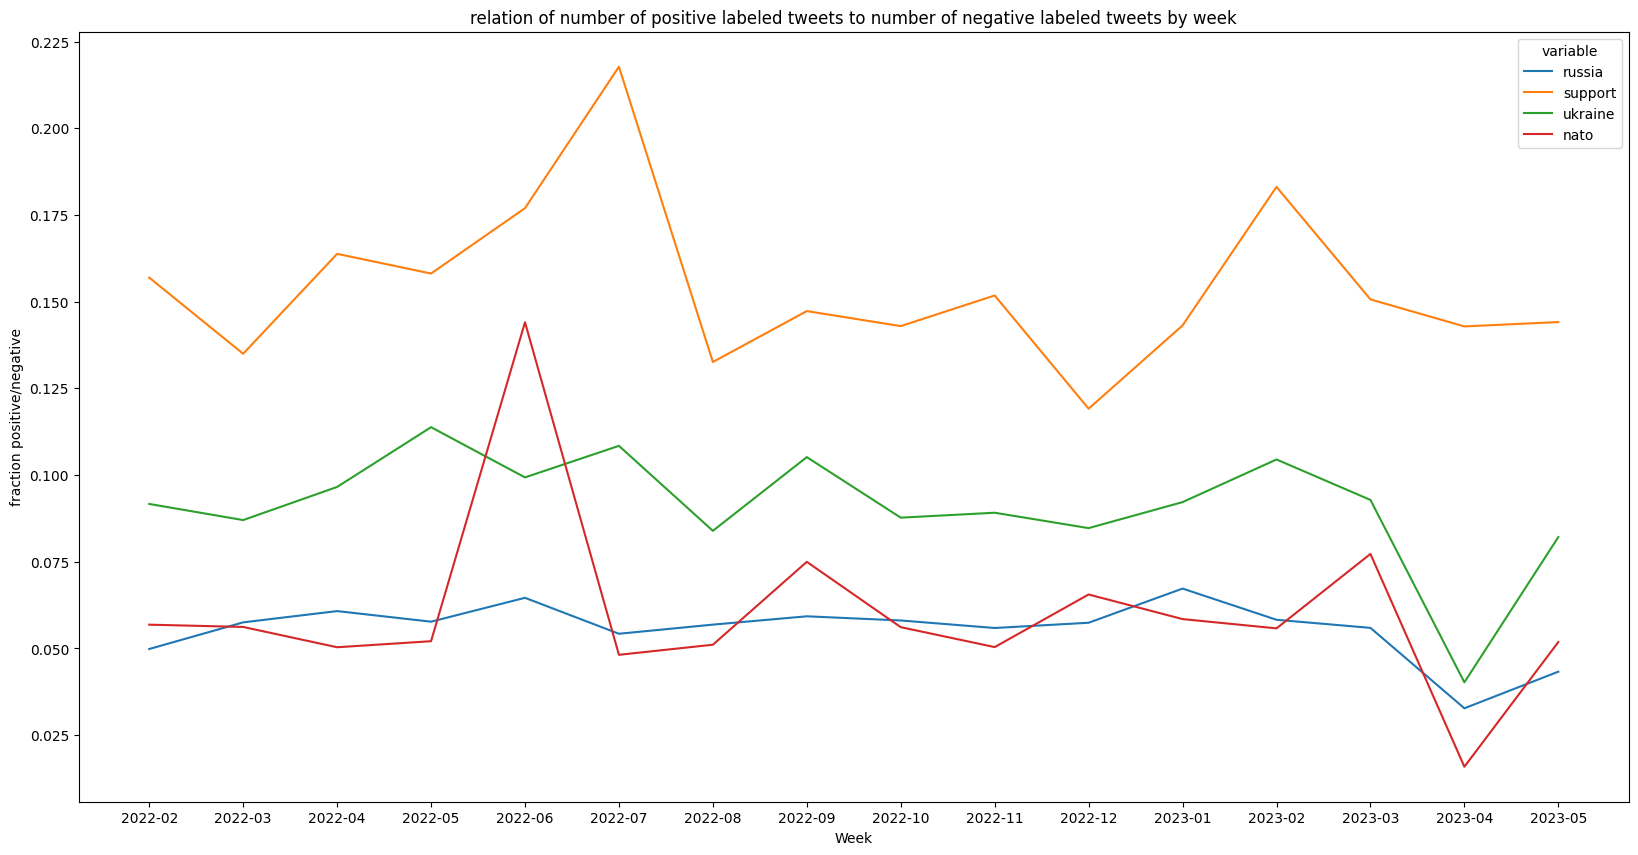

In [200]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [20, 10]
ax = sns.lineplot(
    data=dfs[1]
    .drop(
        ["lang", "sanctions", "gas", "eu", "putin", "zelensky", "kherson", "arms"],
        axis=1,
    )
    .melt("months")
    .sort_values("months")
    .query("months!='2023-06'"),
    x="months",
    y="value",
    hue="variable",
)
# index = ["" for _ in range(len(dfs[0].sort_values("months").reset_index()["months"].unique()))]
# index[::2] = [x[-2:] for x in list(dfs[0].reset_index().sort_values("months")["months"].unique())][::2]
# # sns.set_theme(style="whitegrid")
# ax.set_xticks(range(16))
# ax.set_xticklabels(index[:-1])
ax.set_title(
    "relation of number of positive labeled tweets to number of negative labeled tweets by week"
)
ax.set_ylabel("fraction positive/negative")
ax.set_xlabel("Week")

In [203]:
df = pd.concat(dfs)

In [205]:
df.to_csv("/Users/robinfeldmann/TopicAnalysisRUWTweets/Data/Sentiments/word_sent.csv")

In [102]:
df_de

,Unnamed: 0,text,tweetcreatedts,tweetid,sentiment_label,sentiment_score,lang,date,weeks,lemmas,...,gas,support,war,arms,delivery,peace,Ukraine,Russland,ukraine,russia
3080728,0,"Portfolio-Bewegungen : Raus aus Pharma, rein i...",2022-05-17 00:00:34.000000,1.526352e+18,neutral,0.867156,de,2022-05-17,2022-20,"[portfolio-bewegungen, raus, aus, Pharma, rein...",...,False,False,False,False,False,False,False,False,False,False
3080729,1,#phoenix \nNoch ein Auftritt von @HaraldWelzer...,2022-05-17 00:01:11.000000,1.526352e+18,negative,0.616919,de,2022-05-17,2022-20,"[Phoenix, noch, Auftritt, von, selbstgerechen,...",...,False,False,False,False,False,False,False,False,False,False
3080730,2,Nach #Renault-Werkschliessung: #Russland bring...,2022-05-17 00:02:13.000000,1.526352e+18,neutral,0.893085,de,2022-05-17,2022-20,"[nach, renault-werkschliessung, Russland, brin...",...,False,False,False,False,False,False,False,True,False,True
3080731,3,@Sina080264 #Putin als KGB-Sozialisierter hat ...,2022-05-17 00:02:18.000000,1.526352e+18,negative,0.660907,de,2022-05-17,2022-20,"[Putin, als, kgb-sozialisierter, ja, gerade, l...",...,False,False,False,False,False,False,False,False,False,False
3080732,4,#DDR in Thueringen - Fakten und Links #wissen ...,2022-05-17 00:03:32.000000,1.526353e+18,neutral,0.934210,de,2022-05-17,2022-20,"[DDR, in, thuering, Fakt, links, wissen]",...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4661007,1580279,@aktiv_online @Der_BDI ausgerechnet Russlandga...,2022-05-26 23:54:49.000000,1.529974e+18,negative,0.674916,de,2022-05-26,2022-21,"[ausgerechnet, Russlandgaslobbyist, Russmann, ...",...,False,True,False,False,False,False,True,False,True,False
4661008,1580280,@chefofmembers #Ukraine️ hat einen #Korruption...,2022-05-26 23:56:05.000000,1.529975e+18,negative,0.927961,de,2022-05-26,2022-21,"[ukraine️, Korruptionsindex, hinter, sierra, L...",...,False,False,False,False,False,False,False,False,False,False
4661009,1580281,https://t.co/euHTLocYgG Wenn @Bundeskanzler ni...,2022-05-26 23:56:14.000000,1.529975e+18,negative,0.862215,de,2022-05-26,2022-21,"[Geheimplan, als, ass, i, ärmel, wegen, sicher...",...,False,False,False,False,False,False,False,False,False,False
4661010,1580282,.@SZ Wie muss man das verstehen? Ist das komis...,2022-05-26 23:58:08.000000,1.529975e+18,negative,0.954729,de,2022-05-26,2022-21,"[wie, muss, man, der, verstehen, der, komisch,...",...,False,False,False,False,False,False,True,False,True,False


In [121]:
interesting_words = ["ukraine", "russia", "war", "peace", "nato"]
for word in interesting_words:
    words = get_inverse_translations(word, "de")

    df_de[word] = df_de["lemmas"].apply(lambda x: len(set(x) & set(words)) > 0)

df_nato = (
    df_de[["months", "sentiment_label"] + interesting_words]
    .groupby(["months", "sentiment_label"])
    .sum()
    .reset_index()
)

df_rel = pd.DataFrame()
df_rel["months"] = df_de["months"].unique()
for word in interesting_words:
    df_rel[word] = df_nato.query('sentiment_label=="positive"')[word].values / (
        df_nato.query('sentiment_label=="negative"')[word].values
        + df_nato.query('sentiment_label=="positive"')[word].values
    )

In [114]:
df_rel["months"].unique()

array(['2022-05', '2022-07', '2023-05', '2022-09', '2023-03', '2022-12',
       '2022-10', '2023-01', '2022-03', '2022-11', '2023-02', '2023-04',
       '2022-06', '2022-08', '2022-04', '2023-06', '2022-02'],
      dtype=object)

ValueError: Unable to parse string "de" at position 5

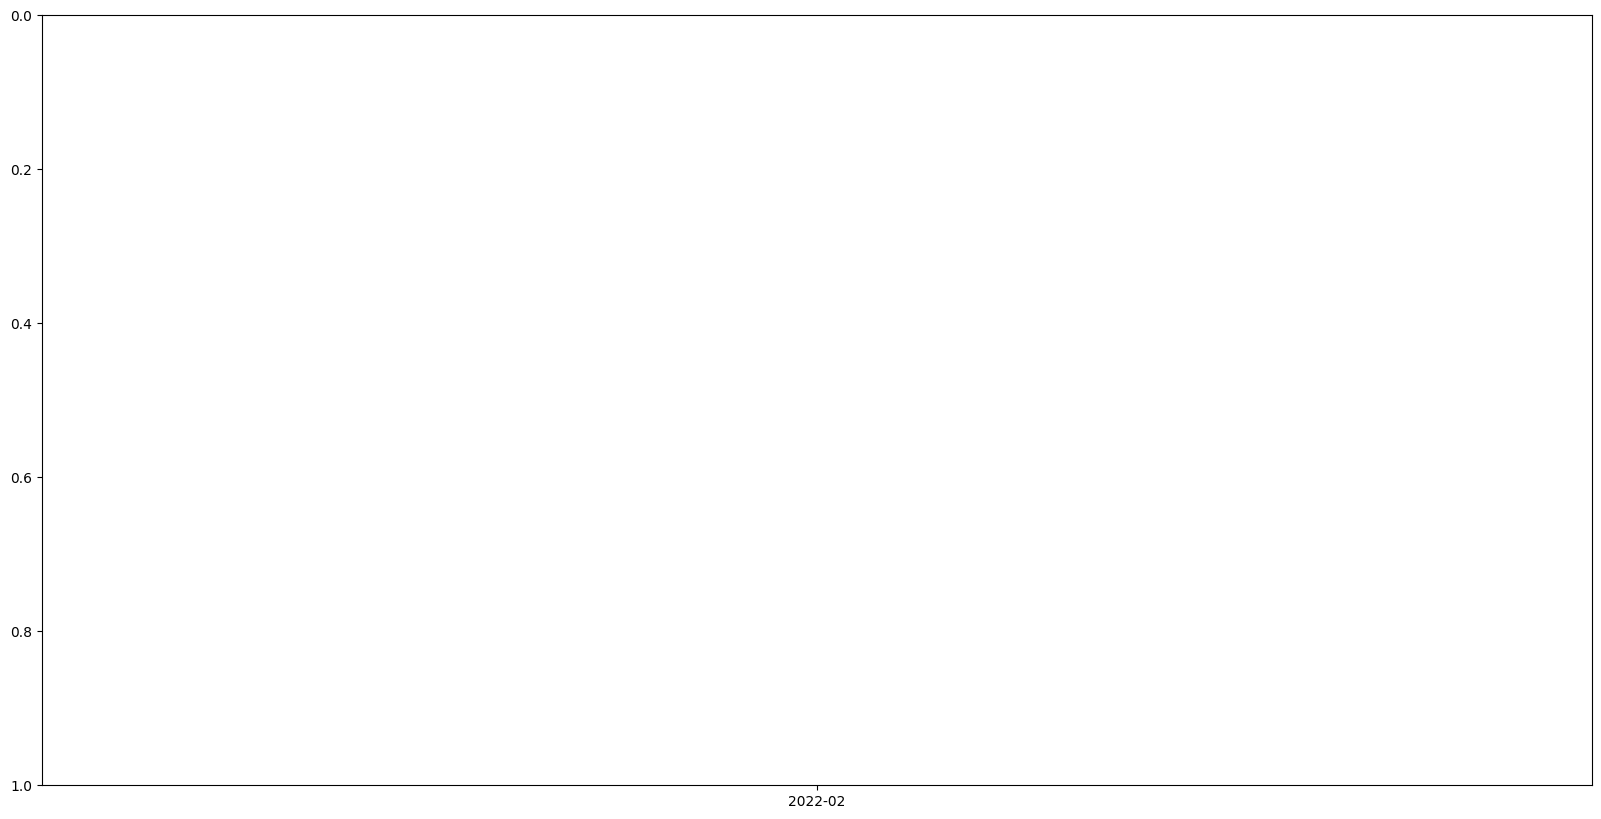

In [158]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [20, 10]
ax = sns.lineplot(
    data=df_rel.melt("months").sort_values("months").query("months!='2023-06'"),
    x="months",
    y="value",
    hue="variable",
)
index = [
    ""
    for _ in range(len(df_rel.sort_values("months").reset_index()["months"].unique()))
]
index[::2] = [
    x[-2:] for x in list(df_rel.reset_index().sort_values("months")["months"].unique())
][::2]
# sns.set_theme(style="whitegrid")
ax.set_xticks(range(16))
ax.set_xticklabels(index[:-1])
ax.set_title(
    "relation of number of positive labeled tweets to number of negative labeled tweets by week"
)
ax.set_ylabel("fraction positive/negative")
ax.set_xlabel("Week")